# **Transformation in frequential domain**

## ***Fourier transform***  
  
#### ***Remove sone signals***

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray

In [2]:
dark_image = imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test5.jpg',0)
#dark_image = imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test3.jpg',0)

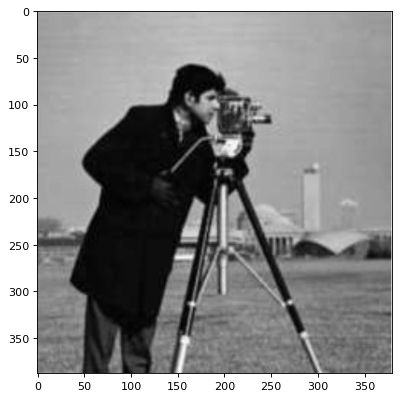

In [3]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')

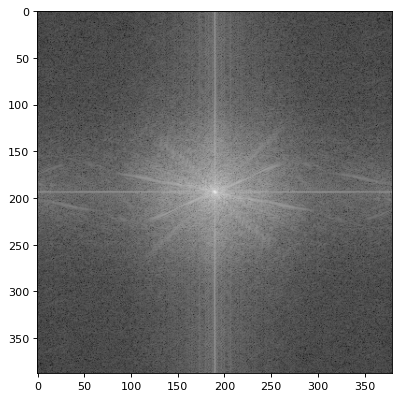

In [4]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

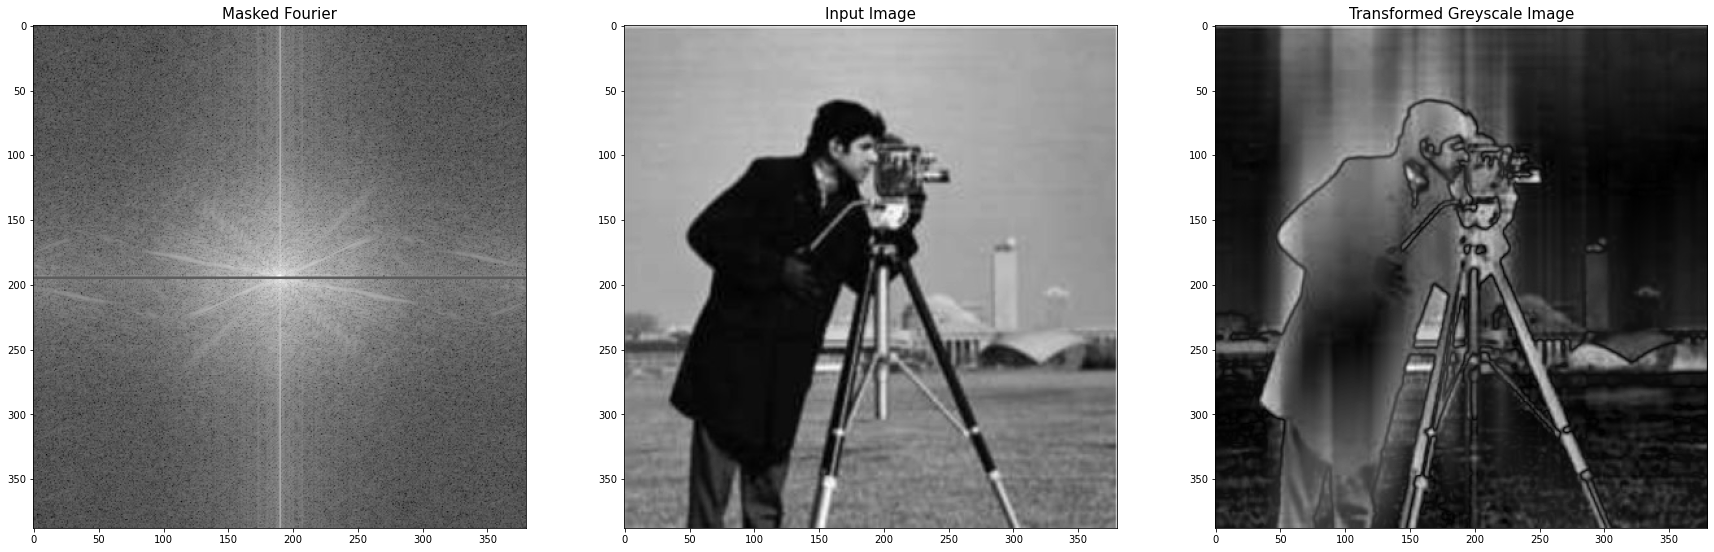

In [5]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    #dark_image_grey_fourier[260:265, :700] = i   #[y, x]
    #dark_image_grey_fourier[260:265, -700:] = i
    #dark_image_grey_fourier[165:166, :700] = i
    #dark_image_grey_fourier[165:166, -700:] = i
    #dark_image_grey_fourier[-300:, 330:333] = i
    #dark_image_grey_fourier[:300, 330:333] = i   
    dark_image_grey_fourier[194:196:, :350] = i
    dark_image_grey_fourier[194:196, -350:] = i 
    fig, ax = plt.subplots(1,3,figsize=(30,30))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Input Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size);
    
fourier_masker_ver(dark_image, 1)

In [6]:
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

dark_image = cv2.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test6.jpg',0)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
#img = dark_image
plt.subplot(151), plt.imshow(dark_image, "gray"), plt.title("Original Image")

original = np.fft.fft2(dark_image)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 118-119: truncated \UXXXXXXXX escape (660550135.py, line 25)

## ***High-pass Gauss filter***  
## ***Low-pass Gauss filter***

In [7]:
from math import sqrt,exp

img = cv2.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test7.jpg',0)
#plt.imshow(img, cmap='gray')

In [8]:
image_fourier = np.fft.fftshift(np.fft.fft2(img))
#plt.imshow(np.log(abs(image_fourier)), cmap='gray');

In [9]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

#D0 cut-off frequency

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

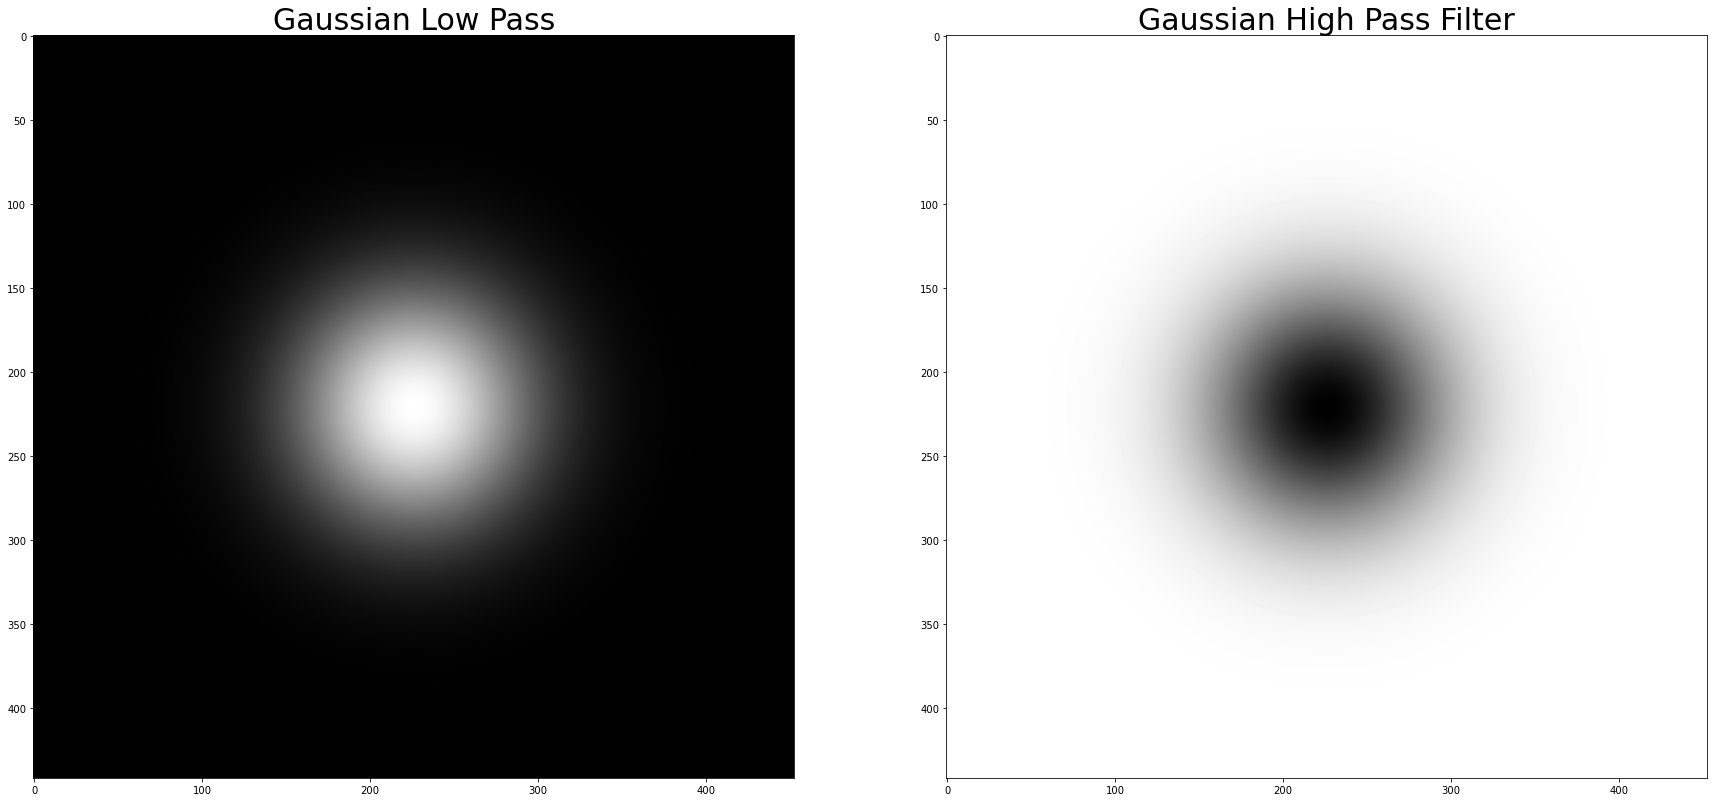

In [10]:
fig, ax = plt.subplots(1,2,figsize=(30,30))

GaussianLP = gaussianLP(50,img.shape)
ax[0].imshow(GaussianLP, "gray")
ax[0].set_title("Gaussian Low Pass",size=30) 

GaussianHP = gaussianHP(50,img.shape)
ax[1].imshow(GaussianHP, "gray")
ax[1].set_title("Gaussian High Pass Filter",size=30)

plt.show()                                                           

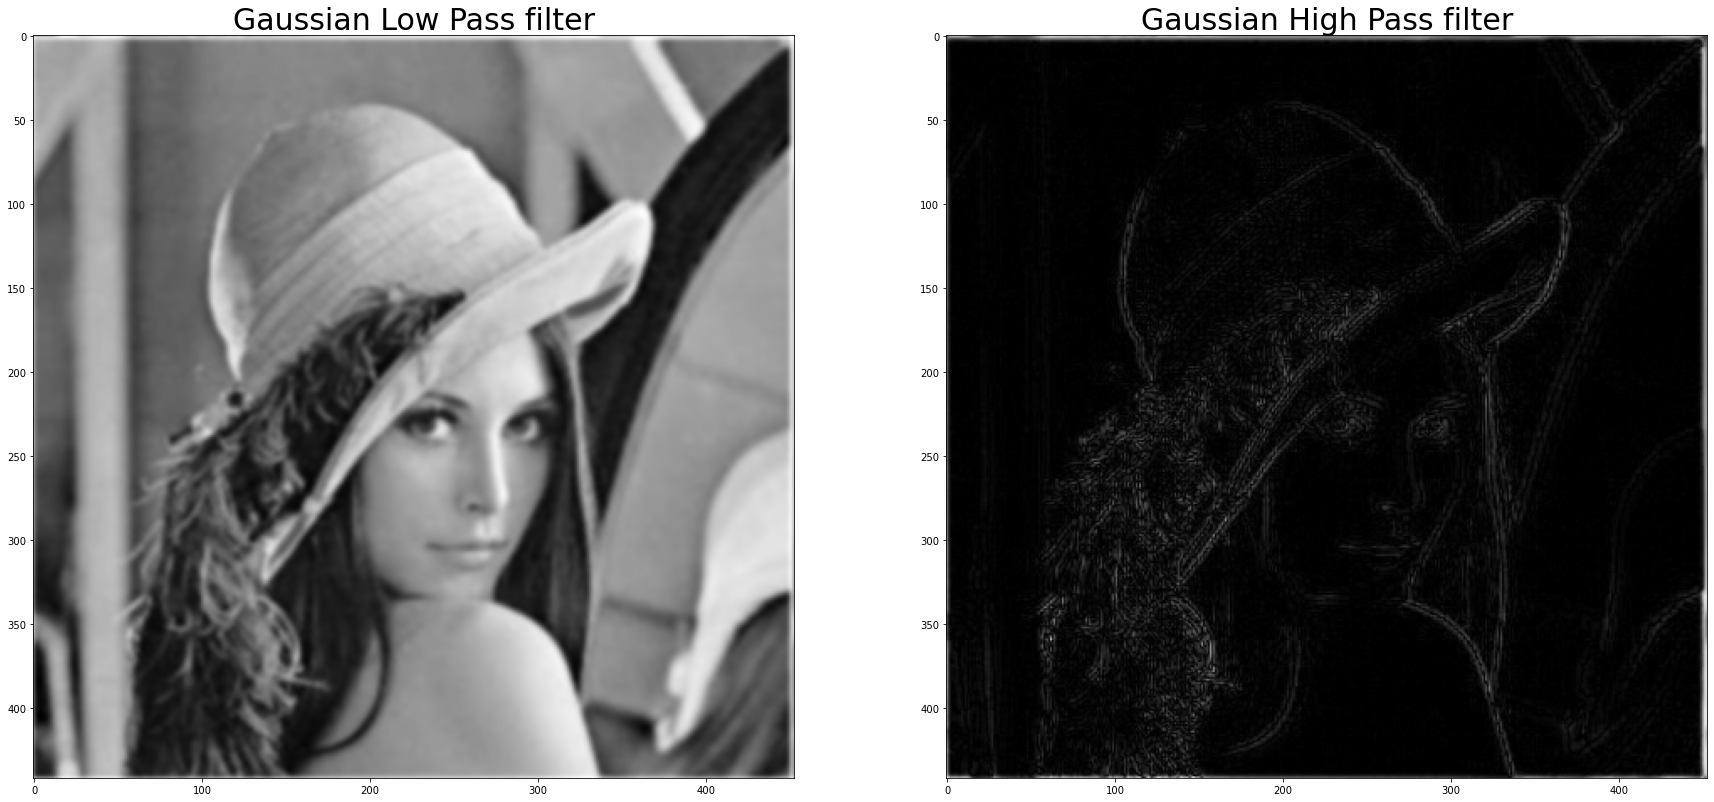

In [11]:
fig, ax = plt.subplots(1,2,figsize=(30,30))

LowPassCenter = image_fourier * GaussianLP
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)

ax[0].imshow(np.abs(inverse_LowPass), "gray")
ax[0].set_title("Gaussian Low Pass filter", size=30)

HighPassCenter = image_fourier * GaussianHP
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
ax[1].imshow(np.abs(inverse_HighPass), "gray")
ax[1].set_title("Gaussian High Pass filter", size =30)


plt.show()